# Practice 1

Student 1: <font color="blue">Alejandro González Álvarez</font>

NIA 1: <font color="blue">252658</font>

Student 2: <font color="blue">Luca Franceschi</font>

NIA 2: <font color="blue">253885</font>

Student 3: <font color="blue">Júlia Othats-Dalès</font>

NIA 3: <font color="blue">254435</font>

# Imports

In [283]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import torch.nn as nn
import pandas as pd
import numpy as np
import torch

# Useful Hyperparameters

In [284]:
hyp_lr = 0.05
hyp_epochs = 50000

# Ex. 1

In [285]:
'''
Steps :
  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes
  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation
  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples
  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.
  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.
'''

'\nSteps :\n  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes\n  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation\n  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples\n  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.\n  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.\n'

## Sol. 1

Training dataset:

   Unnamed: 0         X         Y  C
0           0 -0.263997  1.006942  0
1           1  1.678440 -0.215066  1
2           2 -1.581623 -0.003148  0
3           3 -0.863377  0.751651  0
4           4  0.998721 -0.770067  1
Testing dataset:

   Unnamed: 0         X         Y  C
0           0  1.937660  0.624911  1
1           1 -1.004030 -0.097319  0
2           2  1.542199 -0.114397  0
3           3  0.625708 -0.685214  1
4           4  0.247116 -0.348297  1


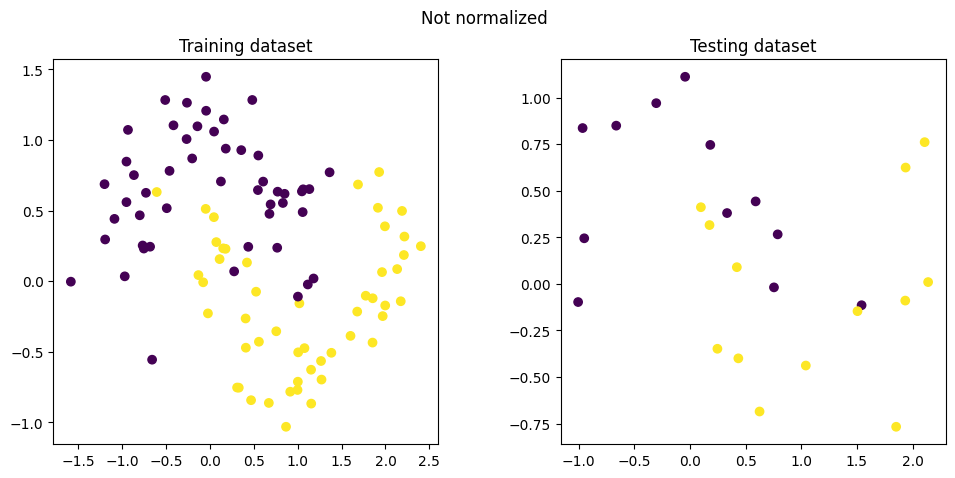

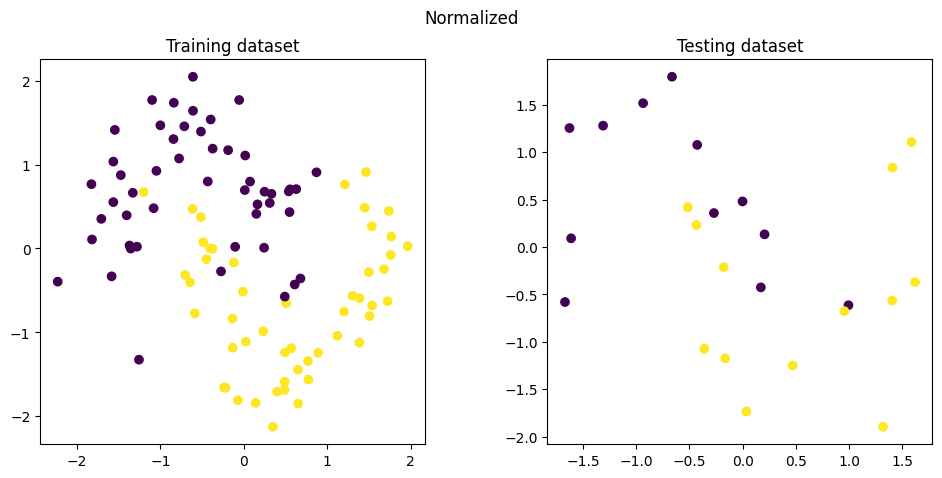

In [286]:
#1. Load train.csv and test.csv
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

# Show 5 first elements of the datasets
print("Training dataset:\n")
print(train_df.head(5))
print("Testing dataset:\n")
print(test_df.head(5))

#2. Visualize both training and testing data
train_labels = train_df[['C']].values
test_labels = test_df[['C']].values

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Not normalized')
axes[0].set_box_aspect(1)
axes[1].set_box_aspect(1)
axes[0].scatter(train_df.X, train_df.Y, c = train_labels)
axes[0].set_title("Training dataset")
axes[1].scatter(test_df.X, test_df.Y, c = test_labels)
axes[1].set_title("Testing dataset")
plt.show()

# Normalize data
train_x = np.array(train_df[["X"]].values)
train_y = np.array(train_df[["Y"]].values)
test_x = np.array(test_df[["X"]].values)
test_y = np.array(test_df[["Y"]].values)

train_data = np.column_stack((train_x, train_y))
test_data = np.column_stack((test_x, test_y))

normalized_train = (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)
normalized_test = (test_data - np.mean(test_data, axis=0)) / np.std(test_data, axis=0)

# normalized_train = (train_df[["X", "Y"]] - np.mean(train_df[["X", "Y"]], axis = 0)) / np.std(train_df[["X", "Y"]], axis = 0)
# normalized_test = (test_df[["X", "Y"]] - np.mean(test_df[["X", "Y"]], axis = 0)) / np.std(test_df[["X", "Y"]], axis = 0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Normalized')
axes[0].set_box_aspect(1)
axes[1].set_box_aspect(1)
axes[0].scatter(normalized_train[:,0], normalized_train[:,1], c = train_labels)
axes[0].set_title("Training dataset")
axes[1].scatter(normalized_test[:,0], normalized_test[:,1], c = test_labels)
axes[1].set_title("Testing dataset")
plt.show()

In [287]:
#3. Implementation of the MLP Class:
class MLP(object):
    def __init__(self,inputNode=2, hiddenNode=3, outputNode=1):
        #Define MLP hyper-parameters
        self.inputLayerSize = inputNode # number of input dimensions (x)
        self.outputLayerSize = outputNode # number of output dimensions (y)
        self.hiddenLayerSize = hiddenNode # Dimension of intermediate layer (W_2)

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X):
        #Compute inputs from outputs
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    # Derivative of sigmoid and loss with respect their inputs
    def sigmoidPrime(self, z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)    # sigmoid(z) * (1 - sigmoid(z))

    def loss(self, yHat, y):
        #Compute loss for given X, y, use weights already stored in class.
        J = -np.mean(y*np.log(yHat) + (1-y)*np.log(1-yHat))
        return J

    # Derivative of parameters
    def backward(self, X, yHat, y):
        self.yHat = yHat
        delta3 = (yHat - y)     # dL / dz3
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1,dJdW2

In [288]:
# Function to train a neural network (NN)
def train(NN:MLP, X, y, epoch=10000, lr=.1):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)

        gradW1,gradW2 = NN.backward(X, yHat, y)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr

        if i%10 == 0 :
            loss = NN.loss(yHat, y)
            if i%100 == 0:
                print('Loss {}={}'.format(i, loss))
            list_loss.append(loss)

    return list_loss

In [289]:
def predict(NN, X):
    return np.round(NN.forward(X)).astype(int)

def accuracy(y, yHat):
    error = 0
    error = np.sum(np.logical_xor(y, yHat))
    return 1 - (error/len(y))

Loss 0=0.7893639309748476
Loss 100=0.33267136961291704
Loss 200=0.33101250897759527
Loss 300=0.3301778639861287
Loss 400=0.3296693883149961
Loss 500=0.3293239397271055
Loss 600=0.32907163909314846
Loss 700=0.33460823222470226
Loss 800=0.33231220117573057
Loss 900=0.33229169646702544
Loss 1000=0.3322884516617573
Loss 1100=0.33228753179978254
Loss 1200=0.33228724681431465
Loss 1300=0.33228715620673477
Loss 1400=0.3322871261121978
Loss 1500=0.33228711501408403
Loss 1600=0.3322871099909118
Loss 1700=0.33228710700857694
Loss 1800=0.33228710479787726
Loss 1900=0.33228710295086084
Loss 2000=0.3322871013287118
Loss 2100=0.3322870998774768
Loss 2200=0.33228709857064004
Loss 2300=0.3322870973911596
Loss 2400=0.33228709632578846
Loss 2500=0.332287095363227
Loss 2600=0.33228709449347255
Loss 2700=0.3322870937075519
Loss 2800=0.33228709299737624
Loss 2900=0.33228709235564324
Loss 3000=0.33228709177575605
Loss 3100=0.3322870912517537
Loss 3200=0.3322870907782508
Loss 3300=0.33228709035038045
Loss 34

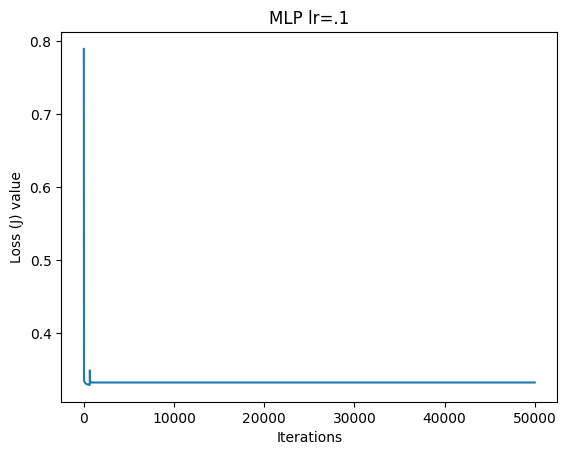

In [290]:
# Instantiate an MLP NN
mlp = MLP()

#4. Train the MLP, visualize decision boundary in 2D, and plot loss at each iteration
list_loss = train(mlp, train_df[["X", "Y"]], train_labels, epoch=hyp_epochs, lr=hyp_lr)

# arange used for better visualization of iterations
plt.plot(10 * np.arange(len(list_loss)), list_loss)
plt.title('MLP lr=.1')
plt.xlabel('Iterations')
plt.ylabel('Loss (J) value')
plt.show()

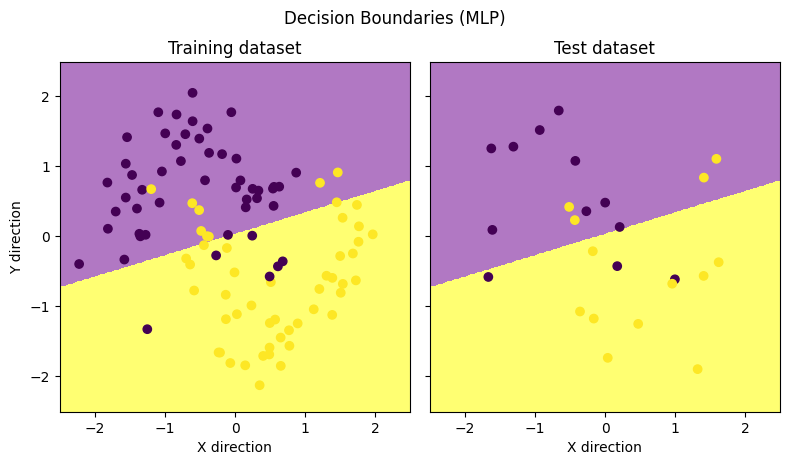

In [291]:
# Visualize the decision boundary in 2D of the classification
def visualize_boundaries(NN, range_x, range_y,
                         norm_train=None, norm_test=None, labels_train=None, labels_test=None,
                         cmap=ListedColormap(['#7E1E9C99', '#FFFF1499']),
                         title='MLP'):
    
    xx, yy = np.meshgrid(np.arange(range_x[0], range_x[1], 0.01), np.arange(range_y[0], range_y[1], 0.01))
    input = np.column_stack((xx.flatten(), yy.flatten()))

    pred = predict(NN, input)
    pred = pred.reshape(xx.shape)

    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,4.5))

    ax[0].set_box_aspect(1)
    ax[1].set_box_aspect(1)

    fig.suptitle('Decision Boundaries ({})'.format(title))
    ax[0].set_title('Training dataset')
    ax[1].set_title('Test dataset')
    ax[0].set_ylabel('Y direction')
    ax[0].set_xlabel('X direction')
    ax[1].set_xlabel('X direction')

    ax[0].pcolormesh(xx, yy, pred, cmap=cmap)
    ax[1].pcolormesh(xx, yy, pred, cmap=cmap)

    if norm_train.all() != None and norm_test.all() != None and labels_train.all() != None and labels_test.all() != None:
        ax[0].scatter(norm_train[:,0], norm_train[:,1], c=labels_train)
        ax[1].scatter(norm_test[:,0], norm_test[:,1], c=labels_test)

    plt.tight_layout()
    plt.show()
    # plt.contour([normalized_test[:, 0], normalized_test[:, 1]], )

visualize_boundaries(mlp, (-2.5, 2.5), (-2.5, 2.5), normalized_train, normalized_test, train_labels, test_labels)

In [292]:
# 5. Apply on test dataset, and accuracy
test_yHat = predict(mlp, normalized_test)
train_yHat = predict(mlp, normalized_train)

train_accuracy = accuracy(train_labels, train_yHat)
test_accuracy = accuracy(test_labels, test_yHat)

print("Accuracy obtained in training dataset: %.2f" % (train_accuracy * 100) + " %.")
print("Accuracy obtained in test dataset: %.2f" % (test_accuracy * 100) + " %.")

Accuracy obtained in training dataset: 85.00 %.
Accuracy obtained in test dataset: 72.00 %.


# Ex. 2

In [293]:
'''
Instead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.
This optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.
Steps :
  1. Try to understand how momentum is implemented reading carefully https://www.ruder.io/optimizing-gradient-descent/#momentum
  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.
  3. Train the MLP implmented in numpy with this new optimizer.
  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.
'''


'\nInstead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.\nThis optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.\nSteps :\n  1. Try to understand how momentum is implemented reading carefully https://www.ruder.io/optimizing-gradient-descent/#momentum\n  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.\n  3. Train the MLP implmented in numpy with this new optimizer.\n  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.\n'

## Sol. 2

In [294]:
class OptimMom(object):
    def __init__(self,learning_rate = .001, gamma = 0.9):
        self.lr = learning_rate
        self.gamma = gamma
        self.last = 0
    # receive the parameters of the MLP and the computed gradients and update the latter
    def step(self,weight_list,gradient):
        uw = []
        for w,grd in zip(weight_list,gradient):
            VdW = (1-self.gamma)*self.last + self.gamma*grd
            uw.append(w - self.lr * VdW)
        return uw

In [295]:
# Same training procedure than befor but using the optimizer class
def train_woptimizer(NN,X, y, epoch = 5000, optim = None):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)

        gradW1,gradW2 = NN.backward(X,yHat,y)
        '''#now update the weight using gradient descent and the optimizer class
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr'''
        NN.W1, NN.W2 = optim.step([NN.W1,NN.W2],[gradW1,gradW2])

        if i%10 == 0 :
            loss = NN.loss(yHat, y)
            if i%100 == 0:
                print('Loss {}={}'.format(i, loss))
            list_loss.append(loss)

    return list_loss

Loss 0=1.0038647405288146
Loss 100=0.33368020715481245
Loss 200=0.3313775051948381
Loss 300=0.33039152041413855
Loss 400=0.32983765215491984
Loss 500=0.32947206013866576
Loss 600=0.3292067145614637
Loss 700=0.3290026575500664
Loss 800=0.35162582490295846
Loss 900=0.33193429048562373
Loss 1000=0.33194851247214074
Loss 1100=0.33193215503801554
Loss 1200=0.3319211582821223
Loss 1300=0.3319129201036721
Loss 1400=0.3319060331700848
Loss 1500=0.3318999584621393
Loss 1600=0.3318944665849168
Loss 1700=0.3318894445330233
Loss 1800=0.3318848267031828
Loss 1900=0.331880568640768
Loss 2000=0.3318766363925469
Loss 2100=0.3318730018902006
Loss 2200=0.3318696408037402
Loss 2300=0.33186653146624573
Loss 2400=0.3318636542887912
Loss 2500=0.3318609914109323
Loss 2600=0.3318585264699811
Loss 2700=0.3318562444334761
Loss 2800=0.33185413146754966
Loss 2900=0.33185217482738977
Loss 3000=0.33185036276257535
Loss 3100=0.33184868443333465
Loss 3200=0.3318471298354293
Loss 3300=0.3318456897322147
Loss 3400=0.33

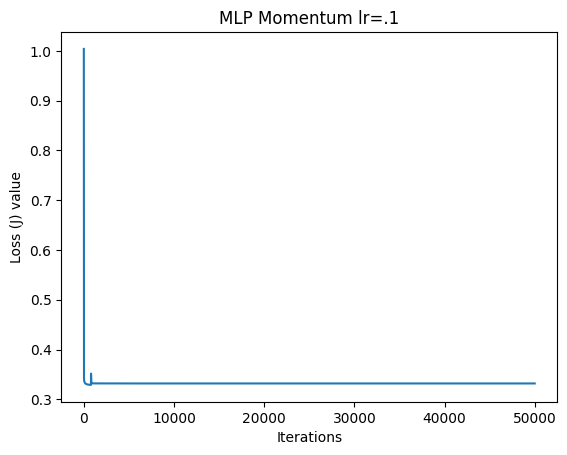

In [296]:
optim = OptimMom(learning_rate=hyp_lr, gamma=0.9)
mlpMom = MLP()

list_loss = train_woptimizer(mlpMom, train_df[["X", "Y"]], np.array([train_labels]).reshape(100, 1), epoch=hyp_epochs, optim=optim)

# arange used for better visualization of iterations
plt.plot(10 * np.arange(len(list_loss)), list_loss)
plt.title('MLP Momentum lr=.1')
plt.xlabel('Iterations')
plt.ylabel('Loss (J) value')
plt.show()

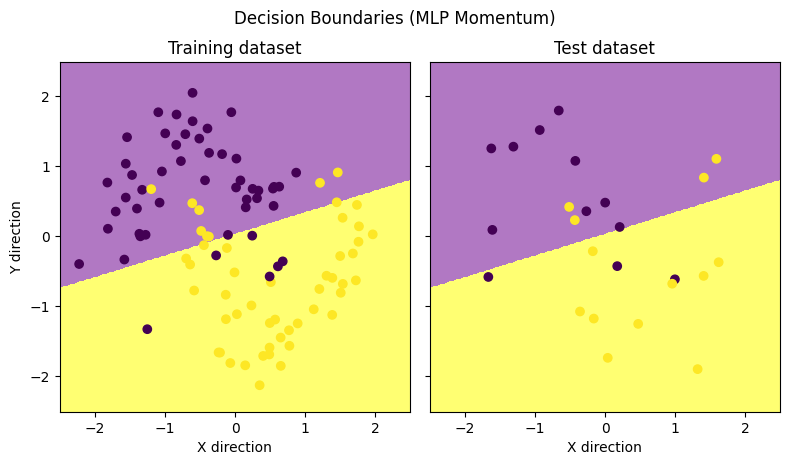

In [297]:
visualize_boundaries(mlpMom, (-2.5, 2.5), (-2.5, 2.5), normalized_train, normalized_test, train_labels, test_labels, title='MLP Momentum')

# Ex. 3

In [298]:
'''
Steps :
  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.
  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates
  3. Analyse the results in each case and discuss them.

HINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.
'''

'\nSteps :\n  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.\n  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates\n  3. Analyse the results in each case and discuss them.\n\nHINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.\n'

## Sol. 3

In [299]:
# Print if gpu acceleration is enabled
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [300]:
class MLP_PyTorch(nn.Module):
    def __init__(self, inputNode=2, hiddenNode=3, outputNode=1):
        super(MLP_PyTorch, self).__init__()
        # Define Hyperparameters
        self.inputLayerSize = inputNode
        self.outputLayerSize = outputNode
        self.hiddenLayerSize = hiddenNode

        self.Linear1 = nn.Linear(self.inputLayerSize, self.hiddenLayerSize)
        self.Linear2 = nn.Linear(self.hiddenLayerSize, self.outputLayerSize)

        nn.init.normal_(self.Linear1.weight, mean=0, std=0.1)
        nn.init.normal_(self.Linear2.weight, mean=0, std=0.1)

        self.sigmoid = nn.Sigmoid() # Module implementing the sigmoid funciton
        self.loss = nn.BCELoss() # Not MSE as in the expample

    def forward(self, X):
        out = self.Linear1(X) # First Linear Layer
        out = self.sigmoid(out) # activation function
        out = self.Linear2(out) # Second Linear Layer
        y_hat = self.sigmoid(out) # final activation function
        return y_hat

def train_PyTorch(NN, X, y, epoch=10000, optimizer=None):
    NN.train()
    list_loss = []

    X.to(device)
    y.to(device)

    for i in range(epoch):
        # reset optimizer at each epoch
        optimizer.zero_grad()

        # Process the dataset with the forward pass
        yHat = NN.forward(X)

        # and compute the loss function
        loss_val = NN.loss(yHat, y)

        # Automatically compute the gradients
        loss_val.backward()
        
        # Call the optimizer to update the paramters
        optimizer.step()

        # Print loss and save the value at each iteration
        if i%500 == 0:
            print('Loss {}={}'.format(i,loss_val))
        list_loss.append(loss_val.item())
        
    print('Loss {}={}'.format(i,loss_val))
    return list_loss

Loss 0=0.6951231360435486
Loss 500=0.5479840040206909
Loss 1000=0.37449249625205994
Loss 1500=0.346970796585083
Loss 2000=0.3412223756313324
Loss 2500=0.3392694890499115
Loss 3000=0.3381580412387848
Loss 3500=0.33729904890060425
Loss 4000=0.33655861020088196
Loss 4500=0.3358989357948303
Loss 5000=0.33530330657958984
Loss 5500=0.33475983142852783
Loss 6000=0.334258109331131
Loss 6500=0.33378860354423523
Loss 7000=0.3333425223827362
Loss 7500=0.33291172981262207
Loss 8000=0.3324893116950989
Loss 8500=0.3320690095424652
Loss 9000=0.3316459655761719
Loss 9500=0.33121630549430847
Loss 10000=0.3307775855064392
Loss 10500=0.33032849431037903
Loss 11000=0.32986897230148315
Loss 11500=0.32940006256103516
Loss 12000=0.32892346382141113
Loss 12500=0.3284412622451782
Loss 13000=0.3279557526111603
Loss 13500=0.3274688720703125
Loss 14000=0.3269822597503662
Loss 14500=0.326496958732605
Loss 15000=0.32601338624954224
Loss 15500=0.3255314230918884
Loss 16000=0.32505059242248535
Loss 16500=0.3245698809

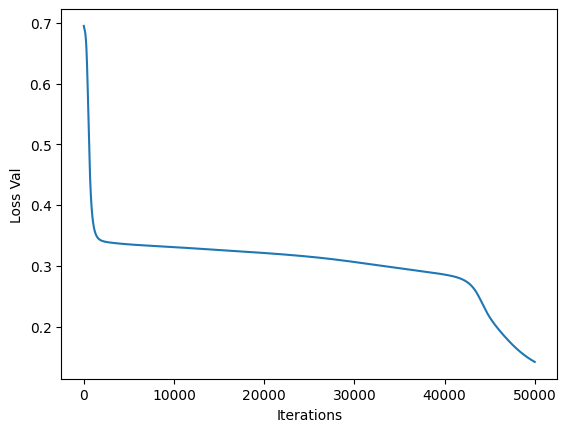

In [301]:
MLP_PT = MLP_PyTorch()
optimizer = torch.optim.SGD(MLP_PT.parameters(), lr=hyp_lr)
list_loss = train_PyTorch(MLP_PT, torch.FloatTensor(normalized_train), torch.FloatTensor(train_labels), epoch=hyp_epochs, optimizer=optimizer)

plt.plot(list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss Val')
plt.show()

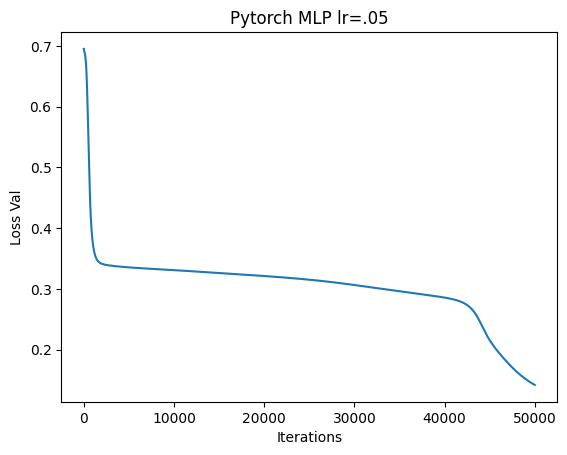

In [302]:
plt.plot(list_loss)
plt.title('Pytorch MLP lr=.05')
plt.xlabel('Iterations')
plt.ylabel('Loss Val')
plt.show()

In [303]:
def predict_PyTorch(NN, X):
    NN.eval()
    return torch.round(NN.forward(torch.Tensor(X)))

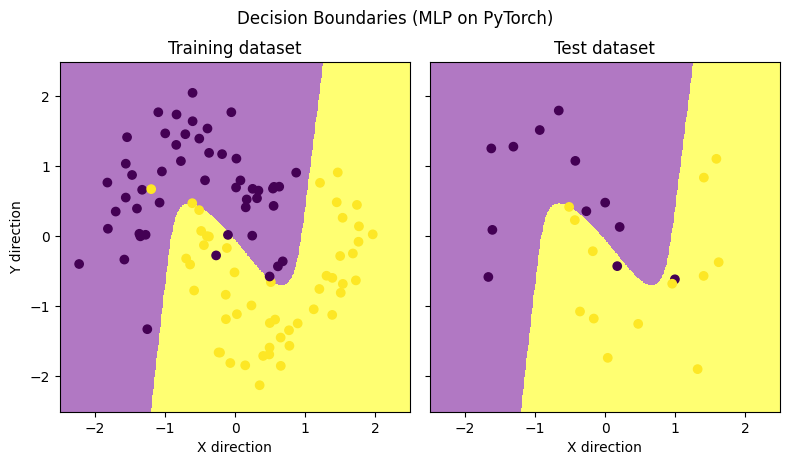

In [304]:
# Visualize the decision boundary in 2D of the classification
def visualize_boundaries_PyTorch(NN, range_x, range_y,
                         norm_train, norm_test, labels_train, labels_test,
                         cmap=ListedColormap(['#7E1E9C99', '#FFFF1499']),
                         title='MLP'):
    
    xx, yy = np.meshgrid(np.arange(range_x[0], range_x[1], 0.01), np.arange(range_y[0], range_y[1], 0.01))
    input = np.column_stack((xx.flatten(), yy.flatten()))

    pred = predict_PyTorch(NN, torch.Tensor(input)).detach().numpy()
    pred = pred.reshape(xx.shape)

    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 4.5))

    ax[0].set_box_aspect(1)
    ax[1].set_box_aspect(1)

    fig.suptitle('Decision Boundaries ({})'.format(title))
    ax[0].set_title('Training dataset')
    ax[1].set_title('Test dataset')
    ax[0].set_ylabel('Y direction')
    ax[0].set_xlabel('X direction')
    ax[1].set_xlabel('X direction')

    ax[0].pcolormesh(xx, yy, pred, cmap=cmap)
    ax[1].pcolormesh(xx, yy, pred, cmap=cmap)

    ax[0].scatter(norm_train[:,0], norm_train[:,1], c=labels_train)
    ax[1].scatter(norm_test[:,0], norm_test[:,1], c=labels_test)

    plt.tight_layout()
    plt.show()
    # plt.contour([normalized_test[:, 0], normalized_test[:, 1]], )

visualize_boundaries_PyTorch(MLP_PT, (-2.5, 2.5), (-2.5, 2.5), normalized_train, normalized_test, train_labels, test_labels, title='MLP on PyTorch')

In [305]:
test_yHat = predict_PyTorch(MLP_PT, normalized_test).detach().numpy()
train_yHat = predict_PyTorch(MLP_PT, normalized_train).detach().numpy()

train_accuracy = accuracy(train_labels, train_yHat)
test_accuracy = accuracy(test_labels, test_yHat)

print("Accuracy obtained in training dataset: %.2f" % (train_accuracy * 100) + " %.")
print("Accuracy obtained in test dataset: %.2f" % (test_accuracy * 100) + " %.")

Accuracy obtained in training dataset: 96.00 %.
Accuracy obtained in test dataset: 92.00 %.
